In [1]:
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

In [2]:
run = wandb.init(project="nyc_airbnb_V2", group="dev", job_type="eda", save_code=True)
local_path = run.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)
df.shape

wandb: Currently logged in as: ghsusanibar (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.32 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


(20000, 16)

In [3]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188


In [4]:
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

/home/gsusanis/miniconda3/envs/mlflow-8af91d08d13566aada991fdb38ca18c4510876b2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='availability_365', ylabel='price'>

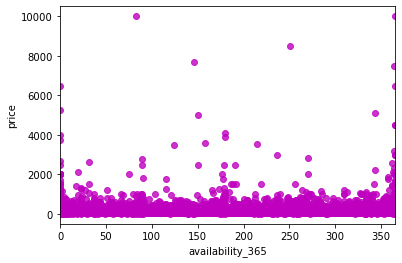

In [7]:
sns.regplot(df['availability_365'],df['price'],color='m')

**Observations:**
1. Missing values:
    - "name" has 7 null values
    - "host_name" has 8 null values
    - "last_review" has 4123 null values
    - "reviews_per_month" has 4123 null values
2. Column types:
    - "last_review" is date but it is in string format
3. Outliers:
    - "Price" column has some outliers (some prices are too expensive) and 5 rows with value 0
4. Skewed:
    - Columns "minimum_nights" and "number_of_reviews" have a skewed distribution

In [8]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [9]:
df.shape

(19001, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  nu

In [11]:
run.finish()